<a href="https://colab.research.google.com/github/cindykhris/SummerInternship2020/blob/master/PCA_MERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Principal Component Analysis (PCA) and Visualization using Python

**Introduction**

Description: In this study, I analyzed the gene expression of coronaviruses (CoVs) infections to determine how each virus differs when causing a disease. Here, I focused the analysis on samples derived from SARS-CoV, MERS, and SARS-CoV-2. 
The raw sequence data (fastq files) for the SARS-CoV-1 was downloaded from GEO [GSE56192](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE56192), including their corresponding Mock-treated controls). The raw sequence data (fastq files) for the SARS-CoV-2 infections were downloaded from GEO [GSE147507](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE147507)), including their corresponding Mock-treated controls). The raw sequence data (fastq files) for the MERS infections were downloaded from GEO [GSE139516](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE139516), including their corresponding Mock-treated controls. Gene expression matrixes were generated using the [BioInfoPlatform](https://server.t-bio.info) described below:


*   PreProcessing
    
      * PCR clean - to remove duplicates from the PCR run  thus reducing redundancy. 
      * Trimmomatic - removes adapter sequences
*   Mapping 
      * Bowtie-2t
* Quantification 

    * RSEM -  Fragment Per Kilobase of transcript per Million mapped reads  for Paired-End Reads

*   Differential Expression

    * DESeq2

Principal Component Analysis steps described in [Renesh Bedre github](https://reneshbedre.github.io/blog/pca_3d.html) were used to analyse the generated gene expression matrix. 

In [1]:
pip install bioinfokit

     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-0.9.6-cp36-none-any.whl size=32041 sha256=43905a0cab55240f6d48d112ddf95420e9dfb7fdf19a980609f7de250f5b3307
  Stored in directory: /root/.cache/pip/wheels/17/e3/d1/dc69854b469f0ad51b2e1c913690e4cc9aa28aae9375f913fc
  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7099 sha256=10641a6d07e2d296d0cca9872e13ea711995529647ed1432bbdd3b5d53532ddf
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit adjustText


In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from bioinfokit.analys import get_data
from bioinfokit.visuz import cluster
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#Load SARS gene expression
df = pd.read_table('drive/My Drive/SummerResearch/prjna580021_expression_genes.txt')
df = df.drop('id',axis=1)
df.columns

Index(['group_1_sample_1_SRR10357377_PE', 'group_1_sample_2_SRR10357376_PE',
       'group_1_sample_3_SRR10357375_PE', 'group_1_sample_4_SRR10357368_PE',
       'group_1_sample_5_SRR10357367_PE', 'group_1_sample_6_SRR10357366_PE',
       'group_2_sample_1_SRR10357374_PE', 'group_2_sample_2_SRR10357373_PE',
       'group_2_sample_3_SRR10357372_PE', 'group_2_sample_4_SRR10357371_PE',
       'group_2_sample_5_SRR10357370_PE', 'group_2_sample_6_SRR10357369_PE'],
      dtype='object')

In [5]:
df = df.rename(columns={
       'group_1_sample_1_SRR10357377_PE': 'A', 
       'group_1_sample_2_SRR10357376_PE': 'A',
       'group_1_sample_3_SRR10357375_PE': 'A', 
       'group_1_sample_4_SRR10357368_PE': 'A',
       'group_1_sample_5_SRR10357367_PE': 'A', 
       'group_1_sample_6_SRR10357366_PE': 'A',
       'group_2_sample_1_SRR10357374_PE': 'B', 
       'group_2_sample_2_SRR10357373_PE': 'B',
       'group_2_sample_3_SRR10357372_PE': 'B', 
       'group_2_sample_4_SRR10357371_PE': 'B',
       'group_2_sample_5_SRR10357370_PE': 'B', 
       'group_2_sample_6_SRR10357369_PE': 'B'})

In [6]:
df.head(5)

,A,A,A,A,A,A,B,B,B,B,B,B
0,0.0,0.0,0.0,656.00,773.00,1085.00,87.00,66.00,63.00,820.00,789.00,670.00
1,0.0,0.0,0.0,434.00,467.00,755.00,76.00,62.00,54.00,611.00,542.00,431.00
2,0.0,0.0,0.0,79.14,101.48,145.85,65.88,60.55,39.85,147.78,133.15,138.18
3,0.0,0.0,0.0,394.86,398.52,546.15,165.12,170.45,183.15,556.62,471.35,484.82
4,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [7]:
#Standarization
df_st = StandardScaler().fit_transform(df)

In [8]:
#see few rows of standarized dataset
pd.DataFrame(df_st, columns=df.columns).head()

,A,A,A,A,A,A,B,B,B,B,B,B
0,-0.161664,-0.064599,-0.034745,0.003993,0.041171,0.045899,-0.068985,-0.087755,-0.088554,0.078034,0.100376,0.041327
1,-0.161664,-0.064599,-0.034745,-0.054716,-0.043112,-0.021926,-0.082371,-0.093000,-0.099779,0.010147,0.009897,-0.035778
2,-0.161664,-0.064599,-0.034745,-0.148560,-0.143789,-0.147126,-0.094685,-0.094902,-0.117426,-0.140316,-0.139869,-0.130245
3,-0.161664,-0.064599,-0.034745,-0.065067,-0.061974,-0.064851,0.026076,0.049228,0.061292,-0.007517,-0.015983,-0.018415
4,-0.161664,-0.064599,-0.034745,-0.169489,-0.171740,-0.177102,-0.174852,-0.174311,-0.165878,-0.188318,-0.188644,-0.174824


In [9]:
#perfom PCA
pca_out = PCA().fit(df_st)

In [10]:
#get the component variance
#proportion of Variance (from PC1 to PC6)
pca_out.explained_variance_ratio_

array([6.75012995e-01, 1.99427657e-01, 7.93644324e-02, 2.15813372e-02,
       1.41676671e-02, 9.44098406e-03, 6.46319165e-04, 1.63332087e-04,
       8.90444085e-05, 7.30540711e-05, 2.13194466e-05, 1.18580845e-05])

In [11]:
#cumulative propotion of variance (from PC1 to PC6)
np.cumsum(pca_out.explained_variance_ratio_
          )

array([0.67501299, 0.87444065, 0.95380508, 0.97538642, 0.98955409,
       0.99899507, 0.99964139, 0.99980472, 0.99989377, 0.99996682,
       0.99998814, 1.        ])

In [12]:
#get component loadings (correlation coefficint between original variables and the component )
loadings = pca_out.components_
num_pc   = pca_out.n_features_
pc_list  = ['PC'+str(i) for i in list(range(1,num_pc+1))]


In [13]:
loading_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loading_df['variable'] = df.columns.values
loading_df = loading_df.set_index('variable')
loading_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
variable,,,,,,,,,,,,
A,0.155536,0.514690,-0.013187,0.756353,-0.327251,0.177406,-0.007027,0.003558,0.001965,-0.004499,0.002152,-0.001299
A,0.080188,0.591566,-0.073858,-0.034467,0.760368,-0.242119,0.006974,0.005693,0.003961,0.005145,-0.007969,0.002917
A,0.053646,0.583248,-0.140424,-0.633737,-0.480963,0.065103,-0.000570,-0.004147,-0.002651,-0.000661,0.003651,-0.001099
A,0.316083,-0.105548,-0.402955,-0.022621,0.085604,0.262328,-0.127494,-0.031168,-0.027947,0.100956,-0.477020,0.627834
A,0.317446,-0.104244,-0.396944,-0.019449,0.082894,0.235101,0.027240,-0.057503,-0.082069,0.160337,-0.245826,-0.755878
A,0.319070,-0.102777,-0.387450,-0.019972,0.084754,0.218895,0.128543,0.047993,0.092810,-0.279761,0.750055,0.117161
B,0.318027,0.011448,0.424995,-0.078471,0.063343,0.199640,0.259313,-0.717875,-0.273860,0.050161,0.062417,0.063891
B,0.321373,0.003326,0.401164,-0.089859,0.066697,0.239040,0.094629,0.196138,0.774448,0.095074,-0.091964,-0.037706
B,0.320870,0.005447,0.403417,-0.090541,0.074817,0.235437,-0.311086,0.535718,-0.510568,-0.137611,0.028491,-0.029071


In [14]:
#get correalation matrix plot for loadings
import seaborn as sns
import matplotlib.pyplot as plt



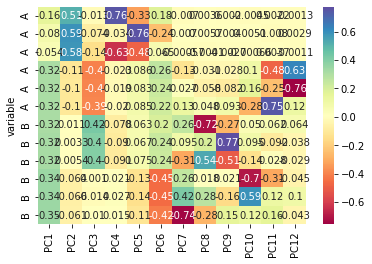

In [15]:
ax = sns.heatmap(loading_df, annot=True, cmap='Spectral')
plt.show()

In [16]:
#Principal component (PC) retention
#get eigenvalues (from PC1 to PC6)
pca_out.explained_variance_

array([8.10044933e+00, 2.39321857e+00, 9.52407685e-01, 2.58985427e-01,
       1.70018163e-01, 1.13295912e-01, 7.75611091e-03, 1.96005603e-03,
       1.06857161e-03, 8.76680607e-04, 2.55842626e-04, 1.42302169e-04])

In [17]:
#get screen plot (for scree or elbow test)


In [18]:
cluster.screeplot(obj=[pc_list, pca_out.explained_variance_ratio_])
#scree plot will be saved in the same directory with name screenplot.png

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [22]:
#PCA loadings plot
#get PCA loadings plots (2D and 3D)
#2D
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))


In [23]:
# 3D
cluster.pcaplot(x=loadings[0], y=loadings[1], z=loadings[2],  labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

In [21]:
#PCA biplot
pca_scores = PCA().fit_transform(df_st)

#get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

#get 3D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))
